In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Dict, List

In [3]:
# load in dataset
csvname = '2d_span_data.csv'
x = np.loadtxt(csvname, delimiter = ',')

print(np.shape(x))  

(2, 50)


#### 8.6) Producing a PCA basis

Repeat the experiment described in Example 8.4, reproducing the illustrations
shown in Figure 8.7. You may use the implementation given in Section 8.3.4 as
a basis for your work.


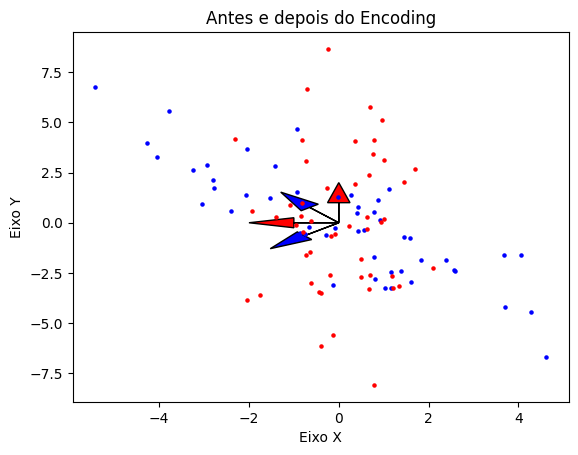

In [32]:
def center(X):
    X_means = np .mean(X,axis= 1)[:,np .newaxis]
    X_centered = X - X_means
    return X_centered

# computa componentes principais de um dataset X
def PCA(X, lam):
    
    # matriz de covariância
    P = float(X. shape[1])
    Cov = 1 /P*np. dot(X,X .T) + lam* np. eye(X. shape[0])

    # autovetores / autovalores
    D,V = np.linalg.eigh(Cov)
    return D,V

def encode(x, C):
    return np.matmul(C, x) 


lamb = 10e-5
centered_x = center(x)
D, V = PCA(centered_x, lamb)
encoded_x = encode(centered_x, V)
D_e, V_e = PCA(encoded_x, lamb)


for v in V:
    plt.arrow(0, 0, v[0], v[1], head_width=0.5, head_length=1, length_includes_head=False, fc='blue', ec='black')
    
for v in V_e:
    plt.arrow(0, 0, v[0], v[1], head_width=0.5, head_length=1, length_includes_head=False, fc='red', ec='black')

plt.scatter(centered_x[0, :], centered_x[1, :], zorder=2, s=5, c='b')
plt.scatter(encoded_x[0, :], encoded_x[1, :], zorder=2, s=5, c='r')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Antes e depois do Encoding')

plt.show()